In [1]:
import numpy as np
import read_FlowersDataset as flowers
import BatchDatsetReader as dataset
import math
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
from scipy import misc
from skimage import color

In [2]:
DATA_DIR = 'logs/image_pred'
IMAGE_SIZE = 256
BATCH_SIZE = 9

In [3]:
def show_images(images, gray=False):
    if gray:
        images = np.reshape(color.rgb2gray(images), [images.shape[0], -1])
    else:
        images = np.reshape(images, [images.shape[0], -1,3])
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn*3, sqrtn*3))
    gs = gridspec.GridSpec(1, images.shape[0])
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        if(gray):
            plt.imshow(img.reshape([sqrtimg,sqrtimg]),cmap = plt.get_cmap('gray'))
        else:
            plt.imshow(img.reshape([sqrtimg,sqrtimg,3]))
        
    return

In [4]:
original_images = {}
pred_images = {}
for filename in glob.glob(DATA_DIR+'/*'):
    if filename.split("/")[-1][:2]=="gt":
        idx = filename.split("/")[-1].split(".")[0][2:]
        original_images[idx]=filename
    elif filename.split("/")[-1][:4]=="pred":
        idx = filename.split("/")[-1].split(".")[0][4:]
        pred_images[idx] = filename

def get_random(count, original_images, pred_images):
    gt = []
    pred = []
    no_images = len(original_images)
    idxs = np.random.choice(no_images, count)
    for i in idxs:
        gt.append(misc.imread(original_images[str(i)]))
        pred.append(misc.imread(pred_images[str(i)]))
    return np.asarray(gt), np.asarray(pred)

/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


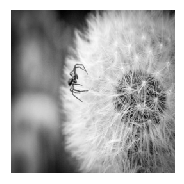

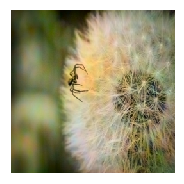

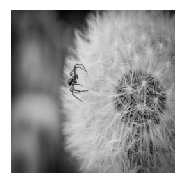

In [5]:
gt = np.asarray([misc.imread(original_images['215'])])
pred = np.asarray([misc.imread(pred_images['215'])])
show_images(gt, True)
show_images(pred)
show_images(gt)

/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


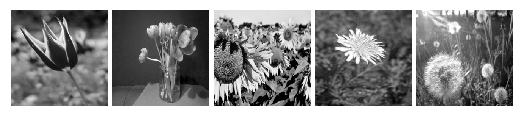

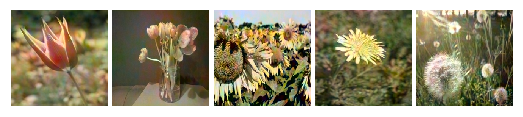

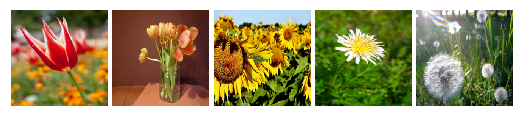

In [11]:
gt, pred = get_random(5, original_images, pred_images )
show_images(gt, True)
show_images(pred)
show_images(gt)


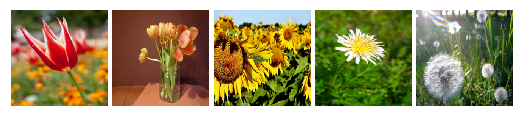

In [12]:
show_images(gt)

In [20]:
from sklearn.metrics import mean_squared_error
pred_mse = 0.0
gray_mse = 0.0
for k in original_images.keys():
    gt = color.rgb2lab(misc.imread(original_images[k]))
    pred = color.rgb2lab(misc.imread(pred_images[k]))
    gt = gt[:, :, 1:3]
    gt = gt.flatten()
    pred = pred[:,:,1:3]
    pred = pred.flatten()
    gray = np.zeros(gt.shape)
    pred_mse += mean_squared_error(gt, pred)
    gray_mse += mean_squared_error(gt, gray)
print("mse of prediction = ", pred_mse/len(original_images))
print("mse of gray image = ", gray_mse/len(original_images))
#print(gt.shape)

/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


mse of prediction =  419.535095001
mse of gray image =  680.682632281


/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


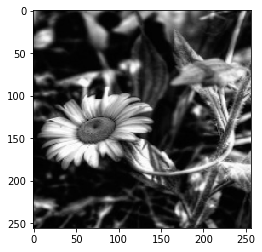

In [30]:
a = misc.imread(original_images['1'])
lab_image = color.rgb2lab(a)
lab_scaled = (lab_image + [0, 128, 128]) / [100, 255, 255]
plt.imshow(lab_image[:,:,0], cmap = plt.get_cmap('gray'))


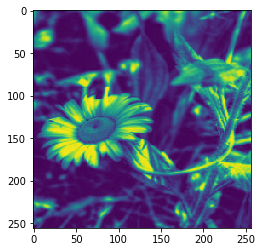

In [28]:
plt.imshow(color.rgb2gray(rgb_image))